In [ ]:
!pip install -q yfinance

In [ ]:
# prompt: get gold data from yahoo finance
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


# For time stamps
from datetime import datetime
import pandas as pd
import yfinance as yf
from datetime import datetime

# Set up End and Start times for data grab
tech_list = ['BTC-USD']  # Use the correct ticker symbol for bitcoin

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

# Access the data
bitcoin_data = globals()['BTC-USD']

# Now you can work with the bitcoin_data DataFrame
print(bitcoin_data.head())

[*********************100%***********************]  1 of 1 completed

Price          Adj Close         Close          High           Low  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2022-12-15  17364.865234  17364.865234  17846.744141  17322.589844   
2022-12-16  16647.484375  16647.484375  17505.525391  16584.701172   
2022-12-17  16795.091797  16795.091797  16800.589844  16614.029297   
2022-12-18  16757.976562  16757.976562  16815.386719  16697.820312   
2022-12-19  16439.679688  16439.679688  16807.527344  16398.136719   

Price               Open       Volume  
Ticker           BTC-USD      BTC-USD  
Date                                   
2022-12-15  17813.644531  20964448341  
2022-12-16  17364.546875  24031608960  
2022-12-17  16646.982422  14463581825  
2022-12-18  16795.609375  10924354698  
2022-12-19  16759.041016  17221074814  


In [ ]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2022-12-15 to 2024-12-15
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  732 non-null    float64
 1   (Close, BTC-USD)      732 non-null    float64
 2   (High, BTC-USD)       732 non-null    float64
 3   (Low, BTC-USD)        732 non-null    float64
 4   (Open, BTC-USD)       732 non-null    float64
 5   (Volume, BTC-USD)     732 non-null    int64  
 6   (MA9, )               0 non-null      float64
 7   (MA21, )              0 non-null      float64
 8   (MA80, )              0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 57.2 KB


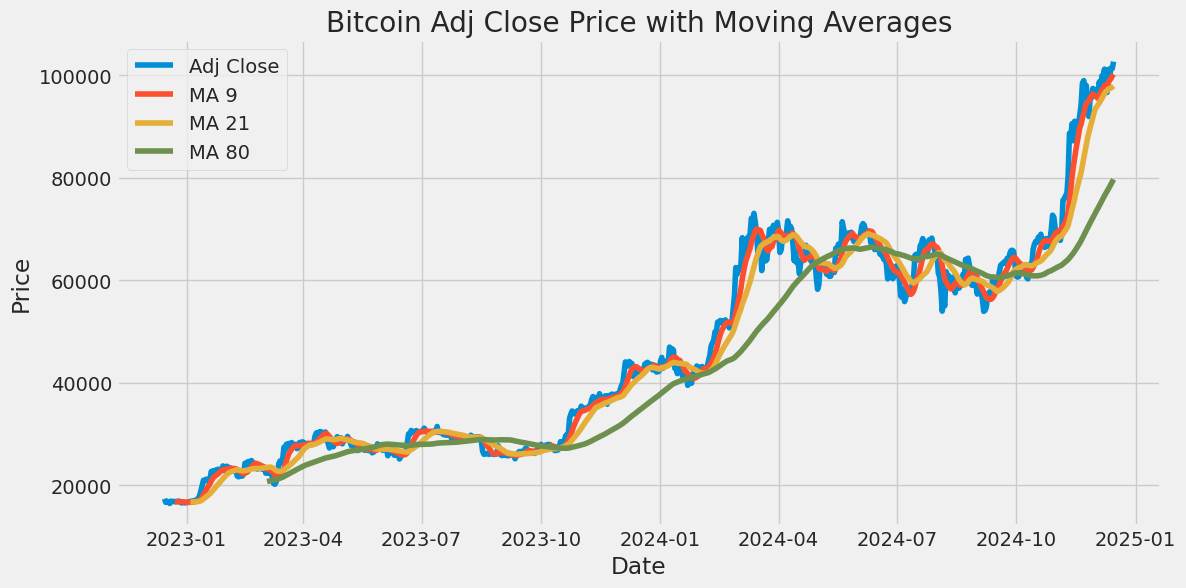

In [ ]:
# prompt: # CREATE a moving average plot for periods 9,21,80  for the adj close for bitcoin_data

# Calculate moving averages
periods = [9, 21, 80]
for period in periods:
    bitcoin_data[f'MA_{period}'] = bitcoin_data['Adj Close'].rolling(window=period).mean()

# Plot the moving averages
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Adj Close'], label='Adj Close')
for period in periods:
    plt.plot(bitcoin_data[f'MA_{period}'], label=f'MA {period}')

plt.title('Bitcoin Adj Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:567: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


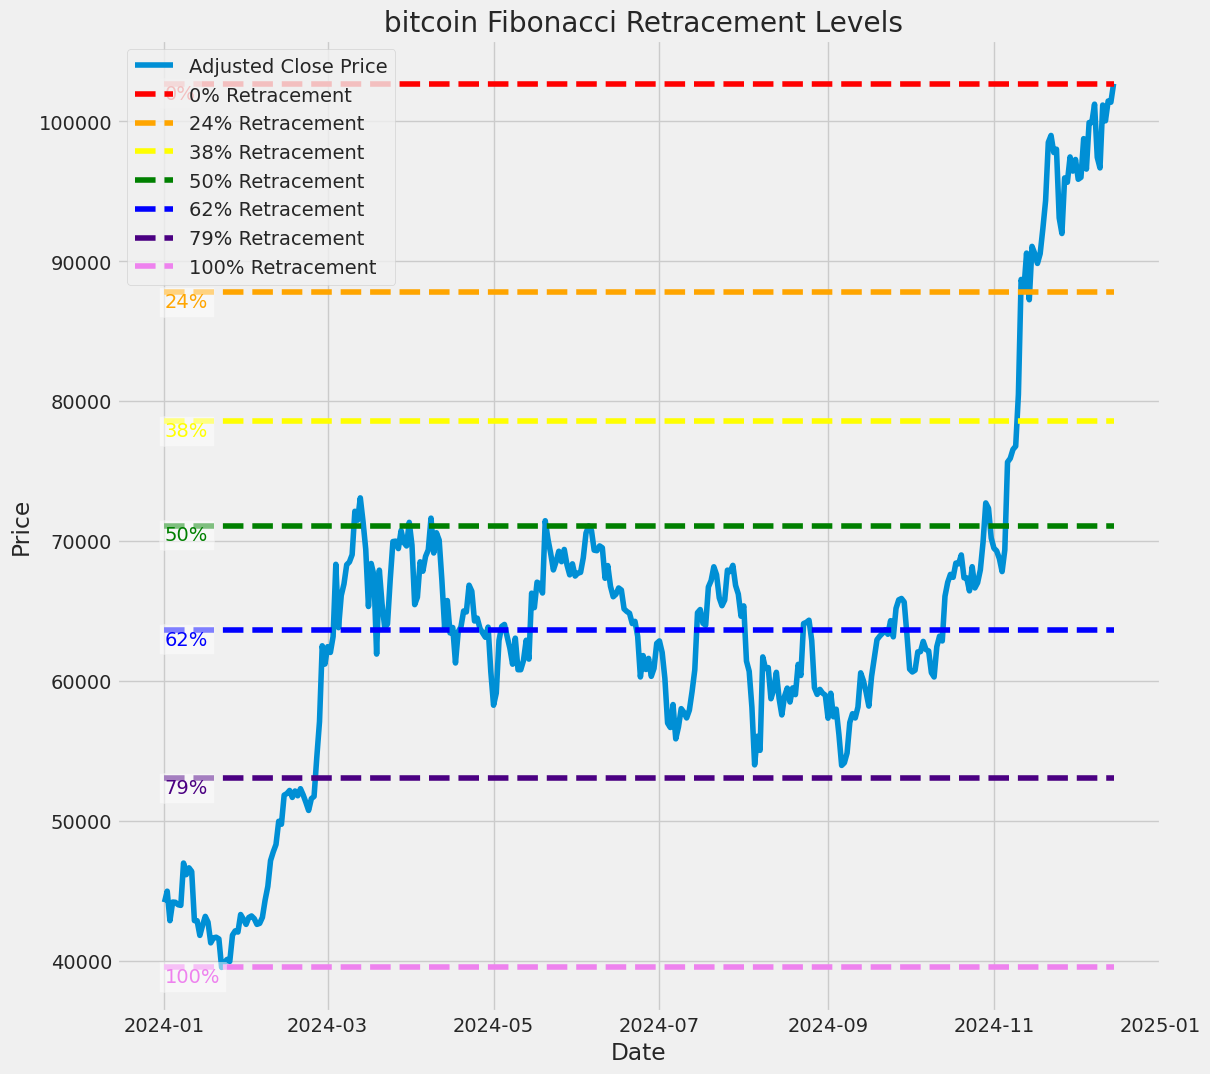

In [ ]:
current_year_data = bitcoin_data[bitcoin_data.index.year == end.year]
highest_price = current_year_data['Adj Close'].max()
lowest_price = current_year_data['Adj Close'].min()
# Fibonacci retracement levels
fib_levels = [0, 0.236, 0.382, 0.5, 0.618, 0.786, 1]
retracement_prices = [highest_price - level * (highest_price - lowest_price) for level in fib_levels]

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

# Plot the retracement levels
plt.figure(figsize=(12, 12))
plt.plot(current_year_data['Adj Close'], label='Adjusted Close Price')

for level, price, color in zip(fib_levels, retracement_prices, colors):
    plt.hlines(price, xmin=current_year_data.index.min(), xmax=current_year_data.index.max(),
               colors=color, linestyles='dashed', label=f'{level*100:.0f}% Retracement')
    plt.text(current_year_data.index.min(), price, f'{level*100:.0f}%',
             va='top', ha='left', color=color, bbox=dict(facecolor='white', alpha=0.5))

plt.title(' bitcoin Fibonacci Retracement Levels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# prompt: # prompt: get the average of the monthly return

# Calculate monthly returns
bitcoin_data['Monthly_Return'] = bitcoin_data['Adj Close'].pct_change()

# Calculate the average of the monthly return
average_monthly_return = bitcoin_data['Monthly_Return'].mean()

print(f"The average monthly return is: {average_monthly_return}")

The average monthly return is: 0.002752967106067223


Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 352ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 2/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0083 - val_loss: 0.0504
Epoch 3/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 4/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 0.0042 - val_loss: 0.0058
Epoch 5/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.0013 - val_loss: 0.0031
Epoch 6/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 0.0020 - val_loss: 0.0041
Epoch 7/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.0020 - val_loss: 0.0161
Epoch 8/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 9/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 10/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.0015 - val_loss: 0.0077
Epoch 11/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - loss: 7.4911e-04 - val_loss: 0.0030
Epoch 12/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - loss: 9.3628e-04 - val_loss:

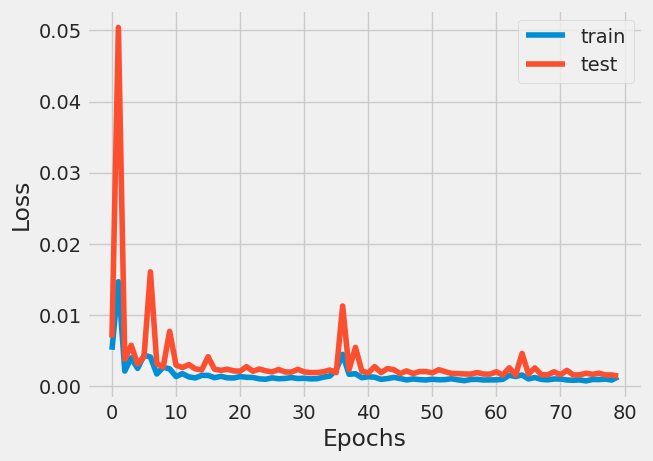

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 21, 200)             │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 21, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          50,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 635,555 (2.42 MB)

 Trainable params: 211,851 (827.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 423,704 (1.62 MB)

None
Train RMSE: 1805.7222370779725
Test RMSE: 3261.027520026089


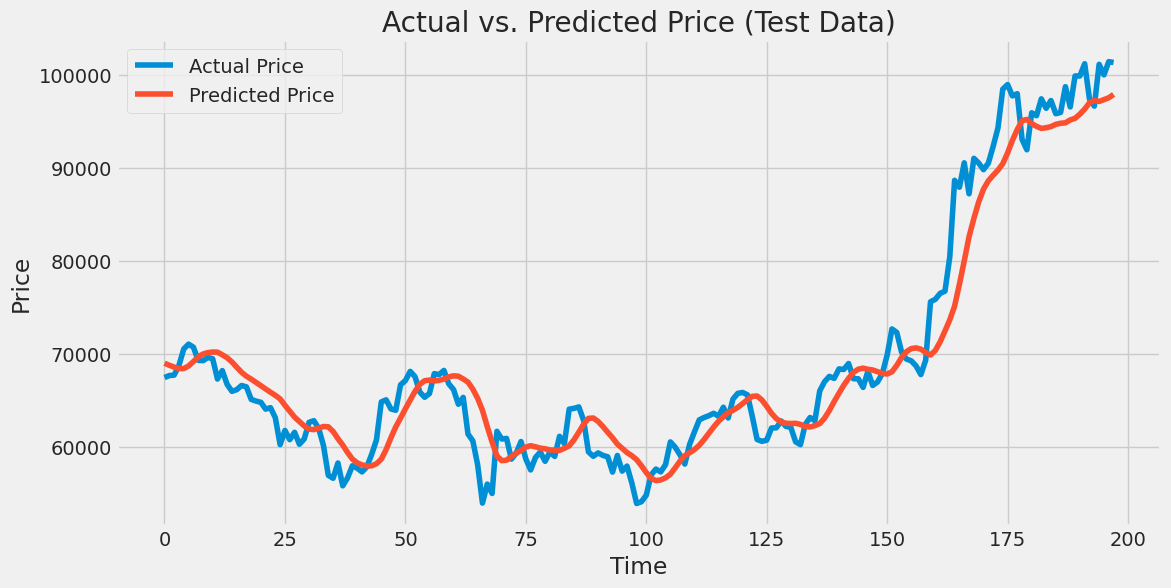

In [ ]:
# prompt: create a tensor flow code and predict by using lstm model

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Prepare the data for LSTM
scaler = MinMaxScaler()
data = bitcoin_data['Adj Close'].values.reshape(-1, 1)
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 21  # Number of previous days to consider
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history=model.fit(X_train, Y_train, epochs=80, batch_size=100, validation_data = (X_test, Y_test),shuffle = False)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Example prediction (last data point in the test set)
last_ten_days = scaled_data[-look_back:]
last_ten_days = np.reshape(last_ten_days,(1,look_back, 1))
predicted_price = model.predict(last_ten_days)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted Price for next day: {predicted_price[0,0]}")
# plot history
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')     #validation/test loss
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

print(model.summary())

from sklearn.metrics import mean_squared_error
import math

# Calculate RMSE for training and testing sets
train_rmse = math.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_rmse = math.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Plot predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(Y_test[0], label='Actual Price')
plt.plot(test_predict[:,0], label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price (Test Data)')
plt.legend()
plt.show()

In [ ]:
# prompt: write a readme notes for this code explaining the steps involved

# Bitcoin Price Prediction using LSTM

This project uses an LSTM (Long Short-Term Memory) recurrent neural network to predict the future price of Bitcoin. The project involves the following steps:

## 1. Data Acquisition and Preparation

* **Install Libraries:** Installs necessary libraries like `yfinance`, `pandas`, `numpy`, `matplotlib`, `seaborn`, `tensorflow` and `scikit-learn`.
* **Fetch Data:** Downloads historical Bitcoin price data from Yahoo Finance using the `yfinance` library.  The code specifies 'BTC-USD' as the ticker symbol. Adjust if necessary.  It downloads data for the past two years.
* **Data Exploration:** Prints the first few rows and info of the data for initial inspection.
* **Moving Averages:** Calculates 9, 21, and 80 day moving averages of the adjusted close price and plots them alongside the adjusted closing price to visualize price trends.
* **Fibonacci Retracement Levels:** Identifies the highest and lowest prices of the current year and calculates Fibonacci retracement levels. These levels are then plotted on the price chart.
* **Monthly Returns:** Calculates and displays the average monthly return on Bitcoin based on adjusted close prices.

## 2. LSTM Model Building and Training

* **Data Scaling:** Uses `MinMaxScaler` to normalize Bitcoin adjusted close price data to a range between 0 and 1.
* **Data Splitting:** Splits the data into training and testing sets (70% training, 30% testing).
* **Dataset Creation:** Creates sequences of past price data (`look_back` period) as input features (X) and the subsequent price as the target (Y) for the LSTM model.
* **Model Architecture:** Defines a sequential LSTM model using TensorFlow/Keras. The model has two LSTM layers with dropout for regularization, followed by a dense output layer.
* **Model Compilation:** Compiles the model using the Adam optimizer and mean squared error loss function.
* **Model Training:** Trains the model on the prepared training data for 80 epochs.  Includes validation data to monitor performance on the test set.
* **Model Summary:** Prints a summary of the model's architecture.
* **Performance Evaluation**:
    - Plots the training and validation loss over epochs to monitor training progress and potential overfitting.
    - Calculates and prints the Root Mean Squared Error (RMSE) on both training and testing data, quantifying the model’s prediction accuracy.
* **Prediction Visualization**: Generates a plot comparing the actual and predicted prices for the test set to visualize model performance.

## 3. Prediction

* **Predicts price:** Makes a prediction for the next day's price using the last `look_back` days of data. Prints the predicted price.


## Usage

1. **Setup:** Make sure you have Python and the necessary libraries installed. You can install them using `pip install -r requirements.txt` (create a `requirements.txt` file listing the required packages).
2. **Run the code:** Execute the Python script.
3. **Interpret Results:** Examine the plots, RMSE values, and the predicted price for insights into Bitcoin price trends.

## Potential Improvements

* **Hyperparameter Tuning:** Experiment with different LSTM layer sizes, dropout rates, epochs, batch size, and `look_back` parameters to optimize the model's performance.
* **Feature Engineering:** Consider incorporating additional features, like trading volume, market sentiment, or other relevant indicators, to improve prediction accuracy.
* **More Robust Validation:** Implement more thorough validation techniques, like cross-validation, to ensure the model generalizes well to unseen data.
* **Alternative Models:** Explore other time series models, like ARIMA or Prophet, for comparison.

